![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)
This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fenômeno de Runge

Vimos na aula passada que os polinômios especiais -
os $\phi_i(x)$ que se anulam em todos os pontos de interpolação exceto um deles -
são oscilatórios, e isso causa erros de aproximação.
Veremos aqui um exemplo onde estes erros ficam cada vez maiores conforme
o número de pontos de interpolação aumenta!

In [2]:
def f(x): return 1/(1 + x**2)

In [3]:
from interpolation import lagrange_v as lagrange, lagrange_basis

### Exercício:

Interpole $f(x) = \frac{1}{1 + x^2}$, usando 5, 10 e 15 pontos igualmente espaçados,
nos três intervalos $[-1,1]$, $[-5,5]$, $[1,5]$.

Veja se o erro aumenta ou diminui conforme usamos mais pontos para interpolar.

In [4]:
# Primeiro, faça para um intervalo, variando o número de pontos
ns = [5,10,15]
I = [-1,1]
ts = np.linspace(-1,1,500)
### Resposta aqui


In [5]:
# Agora, escreva uma função que interpola f em [a,b], usando pontos em ns
def varios_lagrange(f,a,b,ns):
    ### Resposta aqui


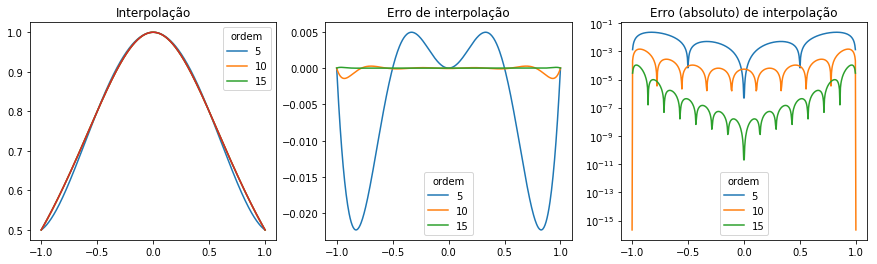

In [6]:
varios_lagrange(f,-1,1,[5,10,15])
plt.show()

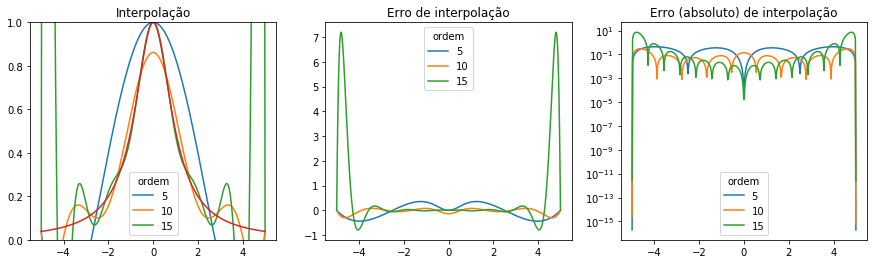

In [7]:
varios_lagrange(f,-5,5,[5,10,15])
plt.gcf().axes[0].set_ylim(0,1)
plt.show()

Veja que este erro "nos cantos" não é tão grande se o intervalo for _apenas_ $[1,5]$:

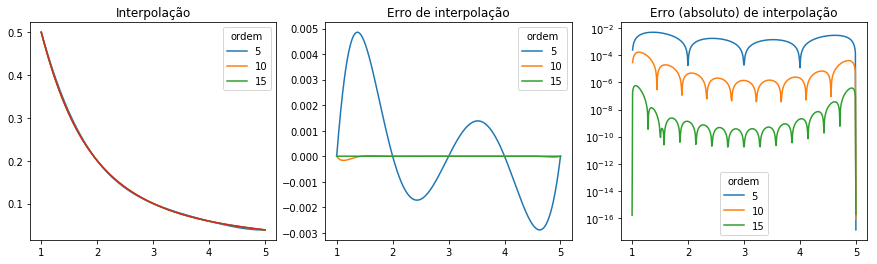

In [8]:
varios_lagrange(f,1,5,[5,10,15])
plt.show()

## Análise

Se $f$ é uma função com $n+1$ derivadas,
podemos estimar o erro cometido pelo polinômio interpolador de grau $n$ através da fórmula:
$$ P_n(x) - f(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!} \prod_{i = 0}^n (x - x_i) $$
onde, como de hábito, $\xi$ é um ponto do intervalo $[a,b]$ que depende de $x$.

Se quisermos estimar o erro, precisamos entender o comportamento de duas componentes:

- a $(n+1)$-ésima derivada de $f$
- o fator $\omega_n(x) = \prod_{i = 0}^n (x - x_i)$, conhecido como _polinômio nodal_ (que se anula em todos os nós de interpolação).

Comecemos por $\omega$.

### Exercício:

Calcule os polinômios nodais para 5 e 15 nós no intervalo $[-5,5]$, e compare suas magnitudes.

In [9]:
def nodal(x):
    ### Resposta aqui


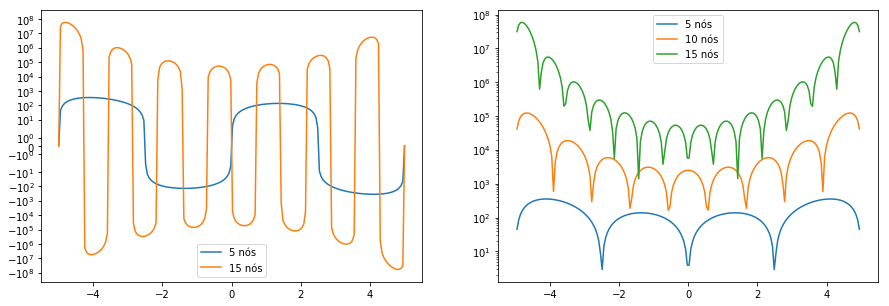

In [10]:
p5 = nodal(np.linspace(-5,5,5))
p10 = nodal(np.linspace(-5,5,10))
p15 = nodal(np.linspace(-5,5,15))
t = np.linspace(-5,5,200)
_, [ax1, ax2] = plt.subplots(ncols=2, figsize=(15,5))
ax1.plot(t, p5(t), label='5 nós')
#ax1.plot(t, p10(t), label='10 nós')
ax1.plot(t, p15(t), label='15 nós')
ax1.set_yscale('symlog')
ax1.legend()

ax2.semilogy(t, abs(p5(t)), label='5 nós')
ax2.semilogy(t, abs(p10(t)), label='10 nós')
ax2.semilogy(t, abs(p15(t)), label='15 nós')
ax2.legend()

plt.show()

### Exercício

Mostre que, se dividirmos o intervalo $[0,1]$ em $n$ partes iguais, e se $x \in (0,1)$, então
$$ \omega_n(x) \leq \frac{n!}{4 n^{n+1}}. $$

Dica: Vimos experimentalmente que os máximos estão perto dos extremos, então comece supondo que $x \in (0, 1/n)$.

Deduza o que acontece num intervalo $[a,b]$ qualquer.

## Limitando

Assim, vemos que o erro de aproximação usando interpolação de Lagrange com pontos igualmente espaçados será, no máximo:
$$ \frac{f^{(n+1)}(\xi)}{(n+1)!} \frac{n!}{4 n^{n+1}} = \frac{f^{(n+1)}(\xi)}{n+1} \frac{1}{4 n^{n+1}}. $$
Portanto, conforme $n$ cresce, temos que compensar a derivada $(n+1)$-ésima
com um fator que é cada vez "melhor" $n^{n+1}$ no denominador.
Infelizmente, para algumas funções, a derivada cresce bem mais rápido do que este fator,
e isso causa os erros que vimos.

# Estabilidade

Uma característica bastante desejável de métodos de interpolação é que estes sejam robustos.
Por exemplo, imagine que estamos usando interpolação para analisar o comportamento de uma função
a partir de dados experimentais.
É claro que estes dados contém erros, e portanto nossa interpolação, também.
Porém, seria extremamente nocivo se os erros da interpolação fossem _muito_ maiores do que os erros iniciais:
o método seria praticamente inútil!

Diremos que um método (algoritmo) é _estável_ quando os erros de saída sejam comparáveis aos dos dados fornecidos.

### Exercício

Analise a robustez dos métodos de derivada discreta em função de $h$.

## Análise de estabilidade

Se temos uma função $f$ que produz os valores $y_i$ dados os pontos $x_i$,
e que há erros de medição e usamos valores perturbados $z_i = (y_i + \varepsilon_i)$,
a diferença entre os polinômios interpoladores $P$ (correto) e $Q$ (com erros) será:
$$ P(x) - Q(x) = \sum_{i = 0}^n y_i \phi_i(x) - \sum_{i = 0}^n z_i \phi_i(x)
  = \sum_{i = 0}^n \varepsilon_i \phi_i(x).$$
Tomando valores absolutos e usando a desigualdade triangular:
$$ \lvert P(x) - Q(x) \rvert \leq \big(\max_i |\varepsilon_i|\big) \sum_{i = 0}^n \lvert \phi_i(x) \rvert.$$

Assim, o "fator de distorção" será, no máximo,
$$\sum_{i = 0}^n \lvert \phi_i(x) \rvert,$$
que só depende dos pontos $x_i$ usados para interpolação.

In [11]:
x = np.linspace(0,1,10)
Pis = lagrange_basis(x)

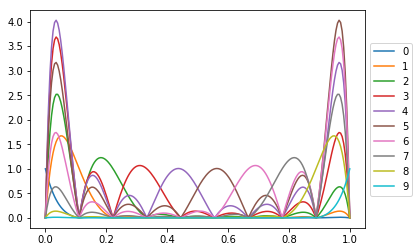

In [12]:
# Verifique que os polinômios da base de Lagrange estão OK:
t = np.linspace(0,1,200)
for i,P in enumerate(Pis):
    plt.plot(t, abs(P(t)), label=str(i))
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

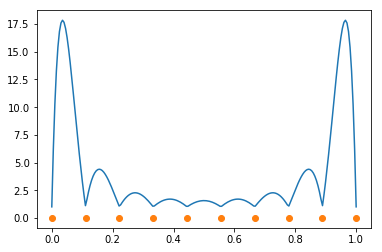

In [13]:
# Agora, faça o gráfico do fator de distorção:
### Resposta aqui


Tomando $n+1$ pontos igualmente espaçados no intervalo $[0,1]$,
é possível mostrar que o fator de distorção em $\frac{1}{2n}$ será da ordem de
$$ \frac{2^n}{n\log{n}}, $$
que tende (rapidamente!) para infinito quando $n$ aumenta.
Assim, não adianta usar mais pontos para garantir um menor erro nas extremidades do intervalo.